In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Reading in the data

In [2]:
covid = pd.read_csv("data/covid_us_impact_by_state.csv")
covid.head()

,State,Confirmed_cases,Deaths
0,Alabama,42862,1007
1,Alaska,1107,16
2,American Samoa,0,0
3,Arizona,94567,1817
4,Arkansas,23209,286


In [3]:
party_data = pd.read_csv("data/party_data_by_state.csv")
party_data.head()

,State,2016 presidentialelection,Governor,State Senate,State House,SeniorU.S. Senator,JuniorU.S. Senator,U.S. House of Representatives,Partisan split (as of 2018[update])
0,Alabama,Republican,Republican,Republican,Republican,Republican,Democratic,Republican,Republican
1,Alaska,Republican,Republican,Republican,Coalition,Republican,Republican,Republican,Republican
2,Arizona,Republican,Republican,Republican,Republican,Democratic,Republican,Democratic,Republican
3,Arkansas,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican
4,California,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic


In [4]:
pop_data = pd.read_csv("raw_data/pop_density_by_state.csv")
pop_data.head()

# Note: density is calculated as population/landArea (in people per square mile)

,State,Density,Pop,LandArea
0,Washington DC,11814.5410,720687,61
1,New Jersey,1215.1985,8936570,7354
2,Rhode Island,1021.4313,1056160,1034
3,Massachusetts,894.4359,6976600,7800
4,Connecticut,735.8695,3563080,4842


In [5]:
policy_data = pd.read_csv("data/mask_and_lockdown_policy_data.csv", index_col = 0)
policy_data.head()

,Date_first_100_infections,Infections,State,Date_first_100_deaths,Deaths,PublicMask_start,PublicMask_eased,PublicMask_ended,StayAtHome_start,StayAtHome_eased,StayAtHome_ended,StayAtHome_Delta,PublicMask_Delta,StayAtHome_deaths_Delta,PublicMask_deaths_Delta,StayAtHome_policy_eased,PublicMask_policy_eased,StayAtHome_policy_ended,PublicMask_policy_ended
index,,,,,,,,,,,,,,,,,,,
0,2020-04-05,112,Guam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-28,100,Puerto Rico,2020-05-07,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-07-04,111,Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-05-14,104,Alabama,2020-05-28,100.0,NaN,NaN,NaN,2020-04-04,NaN,2020-04-30,-40 days +00:00:00.000000000,NaN,-54 days +00:00:00.000000000,NaN,NaN,NaN,26 days 00:00:00.000000000,NaN
4,2020-04-08,103,Alaska,NaN,NaN,NaN,NaN,NaN,2020-03-28,NaN,2020-04-24,-11 days +00:00:00.000000000,NaN,NaN,NaN,NaN,NaN,27 days 00:00:00.000000000,NaN


In [6]:
time_series_deaths = pd.read_csv("raw_data/us_deaths.csv")
time_series_cases = pd.read_csv("raw_data/us_confirmed.csv")

time_series_cases.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Lat,Combined_Key,Date,Case,Long,Country/Region,Province/State
0,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",2020-01-22,0,-170.132,US,American Samoa
1,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",2020-01-23,0,-170.132,US,American Samoa
2,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",2020-01-24,0,-170.132,US,American Samoa
3,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",2020-01-25,0,-170.132,US,American Samoa
4,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",2020-01-26,0,-170.132,US,American Samoa


In [7]:
time_series_deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Lat,Combined_Key,Population,Date,Case,Long,Country/Region,Province/State
0,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",55641,2020-01-22,0,-170.132,US,American Samoa
1,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",55641,2020-01-23,0,-170.132,US,American Samoa
2,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",55641,2020-01-24,0,-170.132,US,American Samoa
3,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",55641,2020-01-25,0,-170.132,US,American Samoa
4,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",55641,2020-01-26,0,-170.132,US,American Samoa


In [8]:
testing = pd.read_csv("raw_data/us_data_including_testing_by_state.csv")
testing.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200708,AK,1226.0,132175.0,NaN,30.0,NaN,NaN,NaN,0.0,...,133401,0,0,44f40820165a4480d4a1b8b031bb7e6bf3a22a40,0,0,0,0,0,NaN
1,20200708,AL,46962.0,421330.0,NaN,1110.0,3006.0,NaN,871.0,NaN,...,468292,25,45,9fc63c874a98fa97cfee6a65d2dff374513b499f,0,0,0,0,0,NaN
2,20200708,AR,24512.0,328760.0,NaN,358.0,1655.0,NaN,NaN,89.0,...,353272,9,51,4e164b092fdeac632ab1c0ba560c678d8d145ee2,0,0,0,0,0,NaN
3,20200708,AS,0.0,816.0,NaN,NaN,NaN,NaN,NaN,NaN,...,816,0,0,bd11dff5c0315e06bc3cb7233119fe603b8a02ad,0,0,0,0,0,NaN
4,20200708,AZ,108614.0,532456.0,NaN,3421.0,5387.0,871.0,NaN,570.0,...,641070,36,115,45c65de1e639130ae8731cd08a825bd067bf53fe,0,0,0,0,0,NaN


In [9]:
testing = testing.rename({"state":"state_abb"}, axis=1)

In [10]:
inv_state_abbs = {"Alabama" : "AL" ,
                  "Alaska" : "AK",
                  "Arizona" : "AZ",
                  "Arkansas" : "AR",
                  "California" : "CA",
                  "Colorado" : "CO",
                  "Connecticut" : "CT",
                  "Delaware" : "DE",
                  "Florida" : "FL",
                  "Georgia" : "GA",
                  "Hawaii" : "HI",
                  "Idaho" : "ID",
                  "Illinois" : "IL",
                  "Indiana" : "IN",
                  "Iowa" : "IA",
                  "Kansas" : "KS",
                  "Kentucky" : "KY",
                  "Louisiana" : "LA",
                  "Maine" : "ME",
                  "Maryland" : "MD",
                  "Massachusetts" : "MA",
                  "Michigan" : "MI",
                  "Minnesota" : "MN",
                  "Mississippi" : "MS",
                  "Missouri" : "MO",
                  "Montana" : "MT",
                  "Nebraska" : "NE",
                  "Nevada" : "NV",
                  "New Hampshire" : "NH",
                  "New Jersey" : "NJ",
                  "New Mexico" : "NM",
                  "New York" : "NY",
                  "North Carolina" : "NC",
                  "North Dakota" : "ND",
                  "Ohio" : "OH",
                  "Oklahoma" : "OK",
                  "Oregon" : "OR",
                  "Pennsylvania" : "PA",
                  "Rhode Island" : "RI",
                  "South Carolina" : "SC",
                  "South Dakota" : "SD",
                  "Tennessee" : "TN",
                  "Texas" : "TX",
                  "Utah" : "UT",
                  "Vermont" : "VT",
                  "Virginia" : "VA",
                  "Washington" : "WA",
                  "West Virginia" : "WV",
                  "Wisconsin" : "WI",
                  "Wyoming" : "WY",
                  "American Samoa" : "AS", 
                  "Washington DC" : "DC", 
                  "Guam" : "GU", 
                  "Mariana Islands" : "MP", 
                  "Puerto Rico" : "PR", 
                  "Virgin Islands" : "VI"}

state_abbs = {v: k for k, v in inv_state_abbs.items()}

In [11]:
testing = testing.assign(State = testing["state_abb"].apply(lambda x: state_abbs[x]))

## Merging the data

In [12]:
df = party_data.merge(covid, on = "State")
df.head()

,State,2016 presidentialelection,Governor,State Senate,State House,SeniorU.S. Senator,JuniorU.S. Senator,U.S. House of Representatives,Partisan split (as of 2018[update]),Confirmed_cases,Deaths
0,Alabama,Republican,Republican,Republican,Republican,Republican,Democratic,Republican,Republican,42862,1007
1,Alaska,Republican,Republican,Republican,Coalition,Republican,Republican,Republican,Republican,1107,16
2,Arizona,Republican,Republican,Republican,Republican,Democratic,Republican,Democratic,Republican,94567,1817
3,Arkansas,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,23209,286
4,California,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,252895,6334


In [13]:
df = df.merge(pop_data, on = "State")
df.head()

,State,2016 presidentialelection,Governor,State Senate,State House,SeniorU.S. Senator,JuniorU.S. Senator,U.S. House of Representatives,Partisan split (as of 2018[update]),Confirmed_cases,Deaths,Density,Pop,LandArea
0,Alabama,Republican,Republican,Republican,Republican,Republican,Democratic,Republican,Republican,42862,1007,96.9221,4908620,50645
1,Alaska,Republican,Republican,Republican,Coalition,Republican,Republican,Republican,Republican,1107,16,1.2863,734002,570641
2,Arizona,Republican,Republican,Republican,Republican,Democratic,Republican,Democratic,Republican,94567,1817,64.9549,7378490,113594
3,Arkansas,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,23209,286,58.4030,3039000,52035
4,California,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,252895,6334,256.3728,39937500,155779


In [14]:
df = df.assign(confirmed_cases_per_1000_inhabitants = df["Confirmed_cases"] / df["Pop"] * 1000)
df = df.assign(deaths_per_1000_inhabitants = df["Deaths"] / df["Pop"] * 1000)
df.head()

,State,2016 presidentialelection,Governor,State Senate,State House,SeniorU.S. Senator,JuniorU.S. Senator,U.S. House of Representatives,Partisan split (as of 2018[update]),Confirmed_cases,Deaths,Density,Pop,LandArea,confirmed_cases_per_1000_inhabitants,deaths_per_1000_inhabitants
0,Alabama,Republican,Republican,Republican,Republican,Republican,Democratic,Republican,Republican,42862,1007,96.9221,4908620,50645,8.731986,0.205149
1,Alaska,Republican,Republican,Republican,Coalition,Republican,Republican,Republican,Republican,1107,16,1.2863,734002,570641,1.508170,0.021798
2,Arizona,Republican,Republican,Republican,Republican,Democratic,Republican,Democratic,Republican,94567,1817,64.9549,7378490,113594,12.816579,0.246256
3,Arkansas,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,23209,286,58.4030,3039000,52035,7.637052,0.094110
4,California,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,252895,6334,256.3728,39937500,155779,6.332269,0.158598


In [15]:
df.to_csv("data/df_everything_but_policy_data.csv", index = False)

In [16]:
df = df.merge(policy_data, on = "State")
df.head()

,State,2016 presidentialelection,Governor,State Senate,State House,SeniorU.S. Senator,JuniorU.S. Senator,U.S. House of Representatives,Partisan split (as of 2018[update]),Confirmed_cases,...,StayAtHome_eased,StayAtHome_ended,StayAtHome_Delta,PublicMask_Delta,StayAtHome_deaths_Delta,PublicMask_deaths_Delta,StayAtHome_policy_eased,PublicMask_policy_eased,StayAtHome_policy_ended,PublicMask_policy_ended
0,Alabama,Republican,Republican,Republican,Republican,Republican,Democratic,Republican,Republican,42862,...,NaN,2020-04-30,-40 days +00:00:00.000000000,NaN,-54 days +00:00:00.000000000,NaN,NaN,NaN,26 days 00:00:00.000000000,NaN
1,Alaska,Republican,Republican,Republican,Coalition,Republican,Republican,Republican,Republican,1107,...,NaN,2020-04-24,-11 days +00:00:00.000000000,NaN,NaN,NaN,NaN,NaN,27 days 00:00:00.000000000,NaN
2,Arizona,Republican,Republican,Republican,Republican,Democratic,Republican,Democratic,Republican,94567,...,NaN,2020-05-16,-15 days +00:00:00.000000000,NaN,-23 days +00:00:00.000000000,NaN,NaN,NaN,46 days 00:00:00.000000000,NaN
3,Arkansas,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,23209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,252895,...,NaN,NaN,-4 days +00:00:00.000000000,87 days 00:00:00.000000000,-78 days +00:00:00.000000000,13 days 00:00:00.000000000,NaN,NaN,NaN,NaN


## Type conversions

In [17]:
columns_to_delta = list(df.columns[-8:])
columns_to_delta

['StayAtHome_Delta',
 'PublicMask_Delta',
 'StayAtHome_deaths_Delta',
 'PublicMask_deaths_Delta',
 'StayAtHome_policy_eased',
 'PublicMask_policy_eased',
 'StayAtHome_policy_ended',
 'PublicMask_policy_ended']

In [18]:
for col in columns_to_delta:
    df[col] = pd.to_timedelta(df[col]).dt.days

time_series_deaths["Date"] = pd.to_datetime(time_series_deaths["Date"])
time_series_cases["Date"] = pd.to_datetime(time_series_cases["Date"])

df["StayAtHome_start"] = pd.to_datetime(df["StayAtHome_start"])
df["StayAtHome_eased"] = pd.to_datetime(df["StayAtHome_eased"])
df["StayAtHome_ended"] = pd.to_datetime(df["StayAtHome_ended"])

df["PublicMask_start"] = pd.to_datetime(df["PublicMask_start"])
df["PublicMask_eased"] = pd.to_datetime(df["PublicMask_eased"])
df["PublicMask_ended"] = pd.to_datetime(df["PublicMask_ended"])

df["Date_first_100_infections"] = pd.to_datetime(df["Date_first_100_infections"])
df["Date_first_100_deaths"] = pd.to_datetime(df["Date_first_100_deaths"])

In [19]:
df = df.rename({"Deaths_x" : "Deaths", 
                "Deaths_y" : "Deaths_when_100_reached", 
                "Infections" : "Confirmed_cases_when_100_reached", 
                "Date_first_100_infections" : "Date_first_100_confirmed_cases"}, axis=1)

In [20]:
df = df.merge(testing.loc[testing["date"] == 20200620, ["State", 'totalTestResults']], on = "State")

In [21]:
df = df.assign(tests_per_1000_inhabitants = df["totalTestResults"]/df["Pop"]*1000)

In [22]:
df.dtypes

State                                           object
2016 presidentialelection                       object
Governor                                        object
State Senate                                    object
State House                                     object
SeniorU.S. Senator                              object
JuniorU.S. Senator                              object
U.S. House of Representatives                   object
Partisan split (as of 2018[update])             object
Confirmed_cases                                  int64
Deaths                                           int64
Density                                        float64
Pop                                              int64
LandArea                                         int64
confirmed_cases_per_1000_inhabitants           float64
deaths_per_1000_inhabitants                    float64
Date_first_100_confirmed_cases          datetime64[ns]
Confirmed_cases_when_100_reached                 int64
Date_first

## Analysis

### Comparing cases and deaths for red and blue states

We started by testing if there were any significant differences in the number of confirmed cases and deaths between the two groups.

In [23]:
scipy.stats.ttest_ind(df.loc[df["2016 presidentialelection"] == "Republican", "Confirmed_cases"], 
                      df.loc[df["2016 presidentialelection"] == "Democratic", "Confirmed_cases"], 
                      equal_var=False)

Ttest_indResult(statistic=-1.1067041881404796, pvalue=0.27899227960666256)

In [24]:
scipy.stats.ttest_ind(df.loc[df["2016 presidentialelection"] == "Republican", "Deaths"], 
                      df.loc[df["2016 presidentialelection"] == "Democratic", "Deaths"], 
                      equal_var=False)

Ttest_indResult(statistic=-1.6692262204046215, pvalue=0.11036736102384771)

In [25]:
df.loc[df["2016 presidentialelection"] == "Republican", "Deaths"].mean()

1427.1666666666667

In [26]:
df.loc[df["2016 presidentialelection"] == "Democratic", "Deaths"].mean()

4306.65

In [27]:
scipy.stats.ttest_ind(df.loc[df["2016 presidentialelection"] == "Republican", "confirmed_cases_per_1000_inhabitants"], 
                      df.loc[df["2016 presidentialelection"] == "Democratic", "confirmed_cases_per_1000_inhabitants"],
                      equal_var=False)

Ttest_indResult(statistic=-1.4944772589505249, pvalue=0.14705111039498747)

In [28]:
scipy.stats.ttest_ind(df.loc[df["2016 presidentialelection"] == "Republican", "deaths_per_1000_inhabitants"], 
                      df.loc[df["2016 presidentialelection"] == "Democratic", "deaths_per_1000_inhabitants"], 
                      equal_var=False)

Ttest_indResult(statistic=-2.6267589032612118, pvalue=0.015500963862708106)

In [29]:
df.loc[df["2016 presidentialelection"] == "Republican", "deaths_per_1000_inhabitants"].mean()

0.19246483742187975

In [30]:
df.loc[df["2016 presidentialelection"] == "Democratic", "deaths_per_1000_inhabitants"].mean()

0.5140193995861481

There is no significant difference in terms of confirmed cases (in total or per capita) nor in terms of total deaths between red and blue states. However, the number of deaths per capita is on average significantly higher for democratic states. 

This makes sense: the first wave of coronavirus hit the northeast coast the hardest (which is mostly democratic), with New York being the epicenter of the pandemic for quite some time. 

We were concerned that splitting the states based on their vote in the 2016 election was not a fair way to divide them; after all, political power is distributed at various levels, from the state governorship to city mayors, all of which are involved in setting health policies in their jurisdictions. The fact that a state voted for one party in the 2016 election does not necessarily mean that the main actors involved in setting policies belong to that state. Therefore, we decided to split the data based on a different criterion. 

We chose to look at the state Governor's party affiliation, because Governors are responsible for issuing statewide orders suchs as stay at home orders or mandatory mask use in public spaces.

In [31]:
scipy.stats.ttest_ind(df.loc[df["Governor"] == "Republican", "deaths_per_1000_inhabitants"], 
                      df.loc[df["Governor"] == "Democratic", "deaths_per_1000_inhabitants"], 
                      equal_var=False)

Ttest_indResult(statistic=-2.113672017999524, pvalue=0.042341387777892134)

The conclusions held; the difference in the number of deaths per capita remained significant at a 95% confidence level.

Because of this, we decided to stick with the 2016 presidential vote as a criterion to split the states into two groups. There might be some differences when you look at different levels of government, but we expect they will be minor when looking at the issue from a state level.

## Visualizing the difference in deaths per capita in red and blue states

In [32]:
df = df.sort_values("deaths_per_1000_inhabitants", ascending=False)

cmap = list(np.where(df["2016 presidentialelection"] == "Democratic", "blue", "red"))

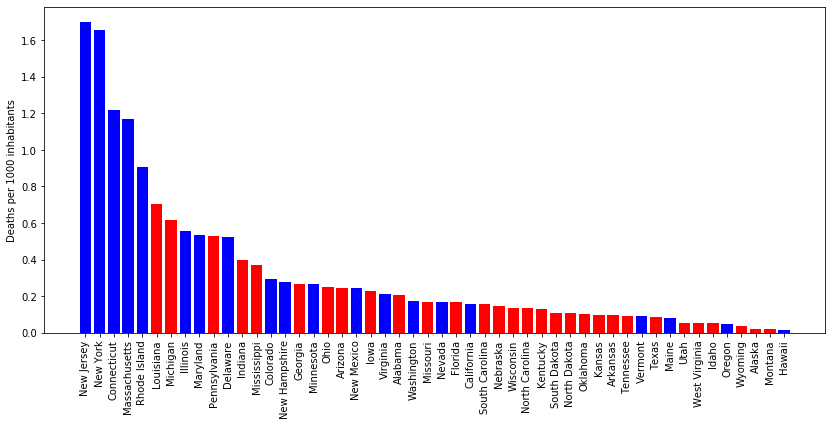

In [33]:
fig, ax = plt.subplots(figsize = (14, 6))

ax.bar(df["State"],
       df["deaths_per_1000_inhabitants"], 
       color = cmap)
plt.ylabel("Deaths per 1000 inhabitants")
plt.xticks(rotation=90);

## Correlation between deaths and population density

Coronavirus tends to spread faster in concentrated urban nuclei rather than in sparser populated rural areas, and hospitals can quickly see themselves overwhelmed, leading to increased death rates. The disease hit nursing homes for the elderly particularly hard (at least in Europe), also a contributing factor for higher death rates. Furthermore, public transportation and events where many people gather, particularly in closed spaces, are also thought to be a major contributor for a quick spread of the disease.

Therefore, we were interested to see if state population density could explain the difference observed before between blue and red states.

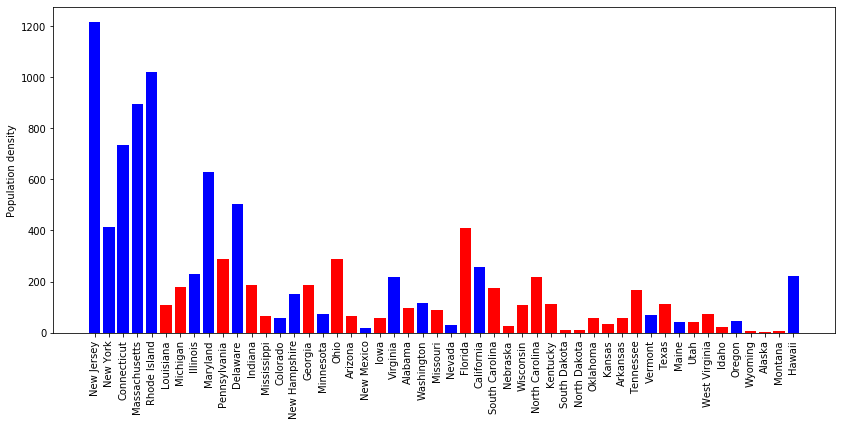

In [34]:
fig, ax = plt.subplots(figsize = (14, 6))

ax.bar(df["State"],
       df["Density"], 
       color = cmap)

plt.ylabel("Population density")

plt.xticks(rotation=90);

In the plot above, the height of the bars corresponds to the population density of each state. Importantly, the states are ordered by deaths per capita. We can see that the most dense states also tend to be first in terms of deaths per capita.

Another way to see this is with the following scatterplots.

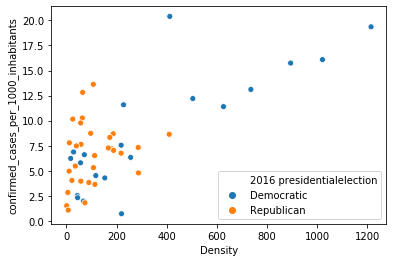

In [35]:
sns.scatterplot(data = df, x = "Density", y = "confirmed_cases_per_1000_inhabitants", hue = "2016 presidentialelection");

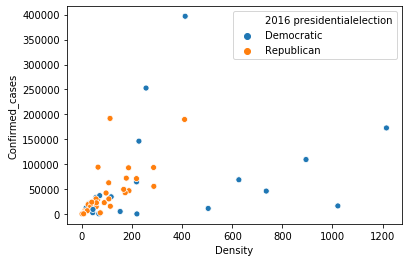

In [36]:
sns.scatterplot(data = df, x = "Density", y = "Confirmed_cases", hue = "2016 presidentialelection");

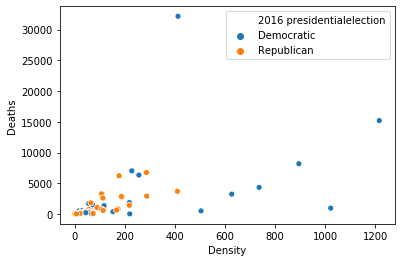

In [37]:
sns.scatterplot(data = df, x = "Density", y = "Deaths", hue = "2016 presidentialelection");

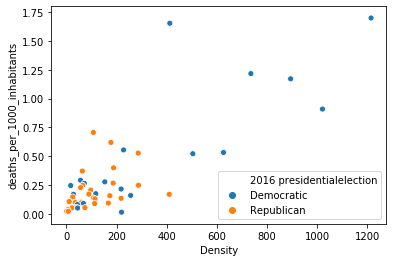

In [38]:
sns.scatterplot(data = df, x = "Density", y = "deaths_per_1000_inhabitants", hue = "2016 presidentialelection");

We next calculated the pearson correlation coefficient for the correlations between density and confirmed cases/deaths, total and per capita:

In [39]:
df["Density"].corr(df["Deaths"])

0.47132524832124534

In [40]:
df["Density"].corr(df["deaths_per_1000_inhabitants"])

0.805247986436947

In [41]:
df["Density"].corr(df["Confirmed_cases"])

0.37665687491527106

In [42]:
df["Density"].corr(df["confirmed_cases_per_1000_inhabitants"])

0.701848594648896

# Effect of policies

## Correlation between start and length of stay at home orders/public mask mandates and cases/deaths

Next we wondered if states that imposed restrictions on their citizens early and for a longer period achieved fewer confirmed cases or deaths.

In [43]:
cols_to_plot = ['StayAtHome_Delta',
 'PublicMask_Delta',
 'StayAtHome_deaths_Delta',
 'PublicMask_deaths_Delta',
 'StayAtHome_policy_eased',
 'StayAtHome_policy_ended']

x_axis_labels = ["Stay at home order start (days from first 100 cases)",
                 "Public mask mandate start (days from first 100 cases)",
                 "Stay at home order start (days from first 100 deaths)",
                 "Public mask mandate start (days from first 100 deaths)", 
                 "Stay at home order length till eased (days)",
                 "Stay at home order length till ended (days)"
]

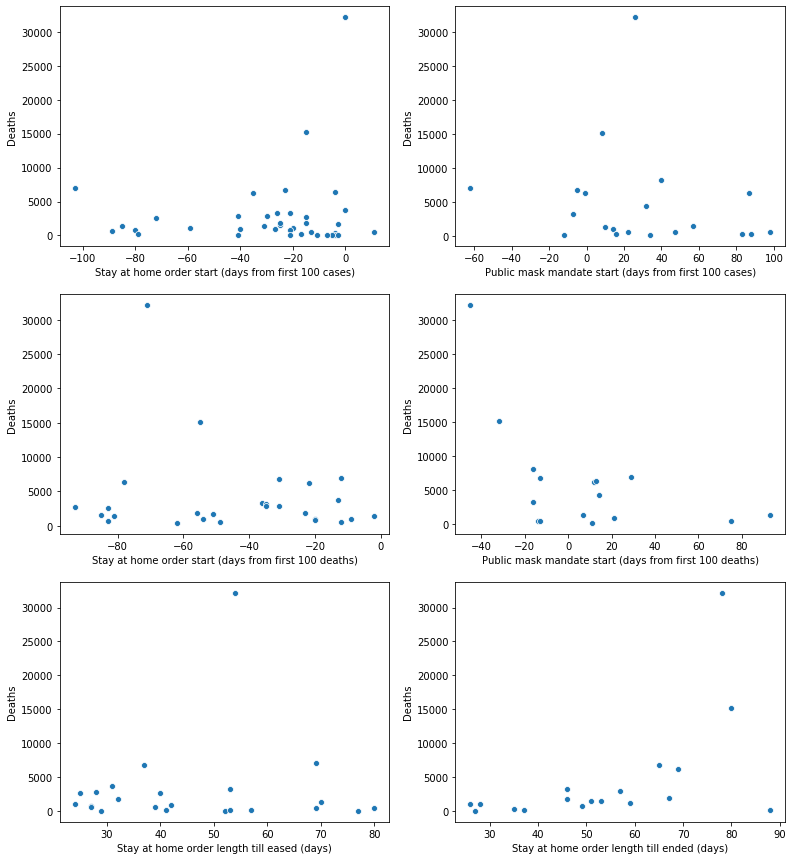

In [44]:
fig, ax = plt.subplots(figsize=(13, 15), nrows=3, ncols=2)

i=0
for col in cols_to_plot:
    sns.scatterplot(data = df, x = col, y = "Deaths", ax=ax.flatten()[i])
    ax.flatten()[i].set_xlabel(x_axis_labels[i])
    i+=1

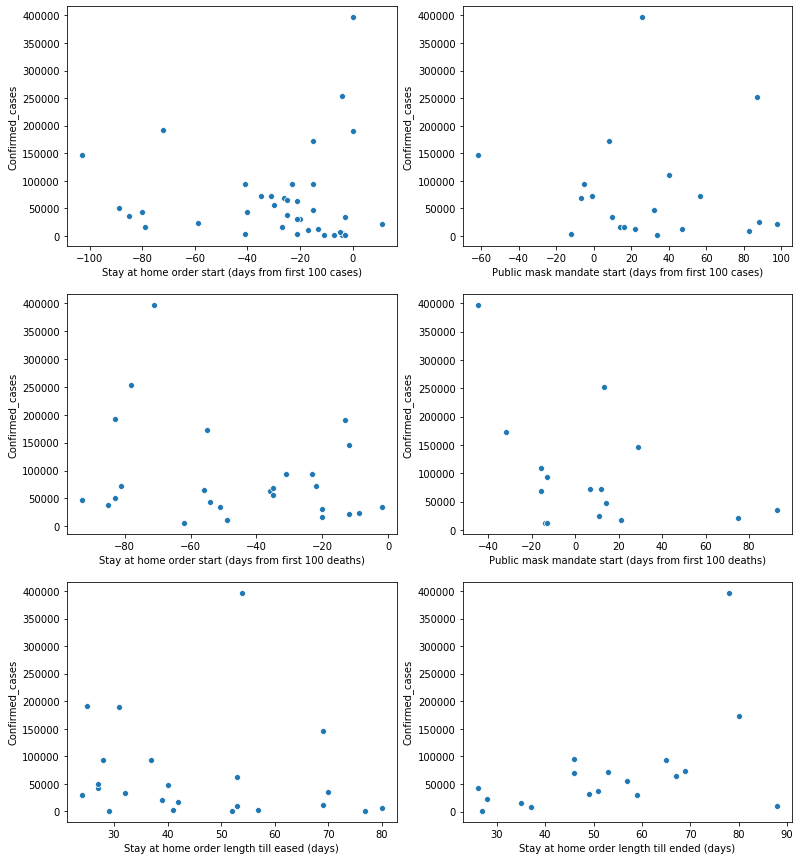

In [45]:
fig, ax = plt.subplots(figsize=(13, 15), nrows=3, ncols=2)

i=0
for col in cols_to_plot:
    sns.scatterplot(data = df, x = col, y = "Confirmed_cases", ax=ax.flatten()[i])
    ax.flatten()[i].set_xlabel(x_axis_labels[i])
    i+=1

We did not observe any meaningful correlation between confirmed cases/deaths and the start or length of the stay at home orders and public mask mandates.

We decided to take a look state by state.

In [46]:
how_to_plot = []

for row in df.index:
    if pd.notna(df.loc[row, "StayAtHome_start"]) and pd.notna(df.loc[row, "StayAtHome_eased"]):
        how_to_plot.append("eased") # eased, regardless of whether it ended or not
    elif pd.notna(df.loc[row, "StayAtHome_start"]) and pd.isna(df.loc[row, "StayAtHome_eased"]) and pd.notna(df.loc[row, "StayAtHome_ended"]):
        how_to_plot.append("ended") # not eased, and ended
    elif pd.notna(df.loc[row, "StayAtHome_start"]) and pd.isna(df.loc[row, "StayAtHome_eased"]) and pd.isna(df.loc[row, "StayAtHome_ended"]):
        how_to_plot.append("ongoing") # ongoing
    else:
        how_to_plot.append("none") # no mandatory statewide stay at home order whatsoever
        
df = df.assign(how_to_plot = how_to_plot)

In [47]:
df["how_to_plot"].value_counts()

eased      23
ended      14
none       12
ongoing     1
Name: how_to_plot, dtype: int64

In [48]:
df["color_2016_pe"] = np.where(df["2016 presidentialelection"] == "Democratic", "blue", "red")

In [49]:
df = df.sort_values("Density", ascending = False)

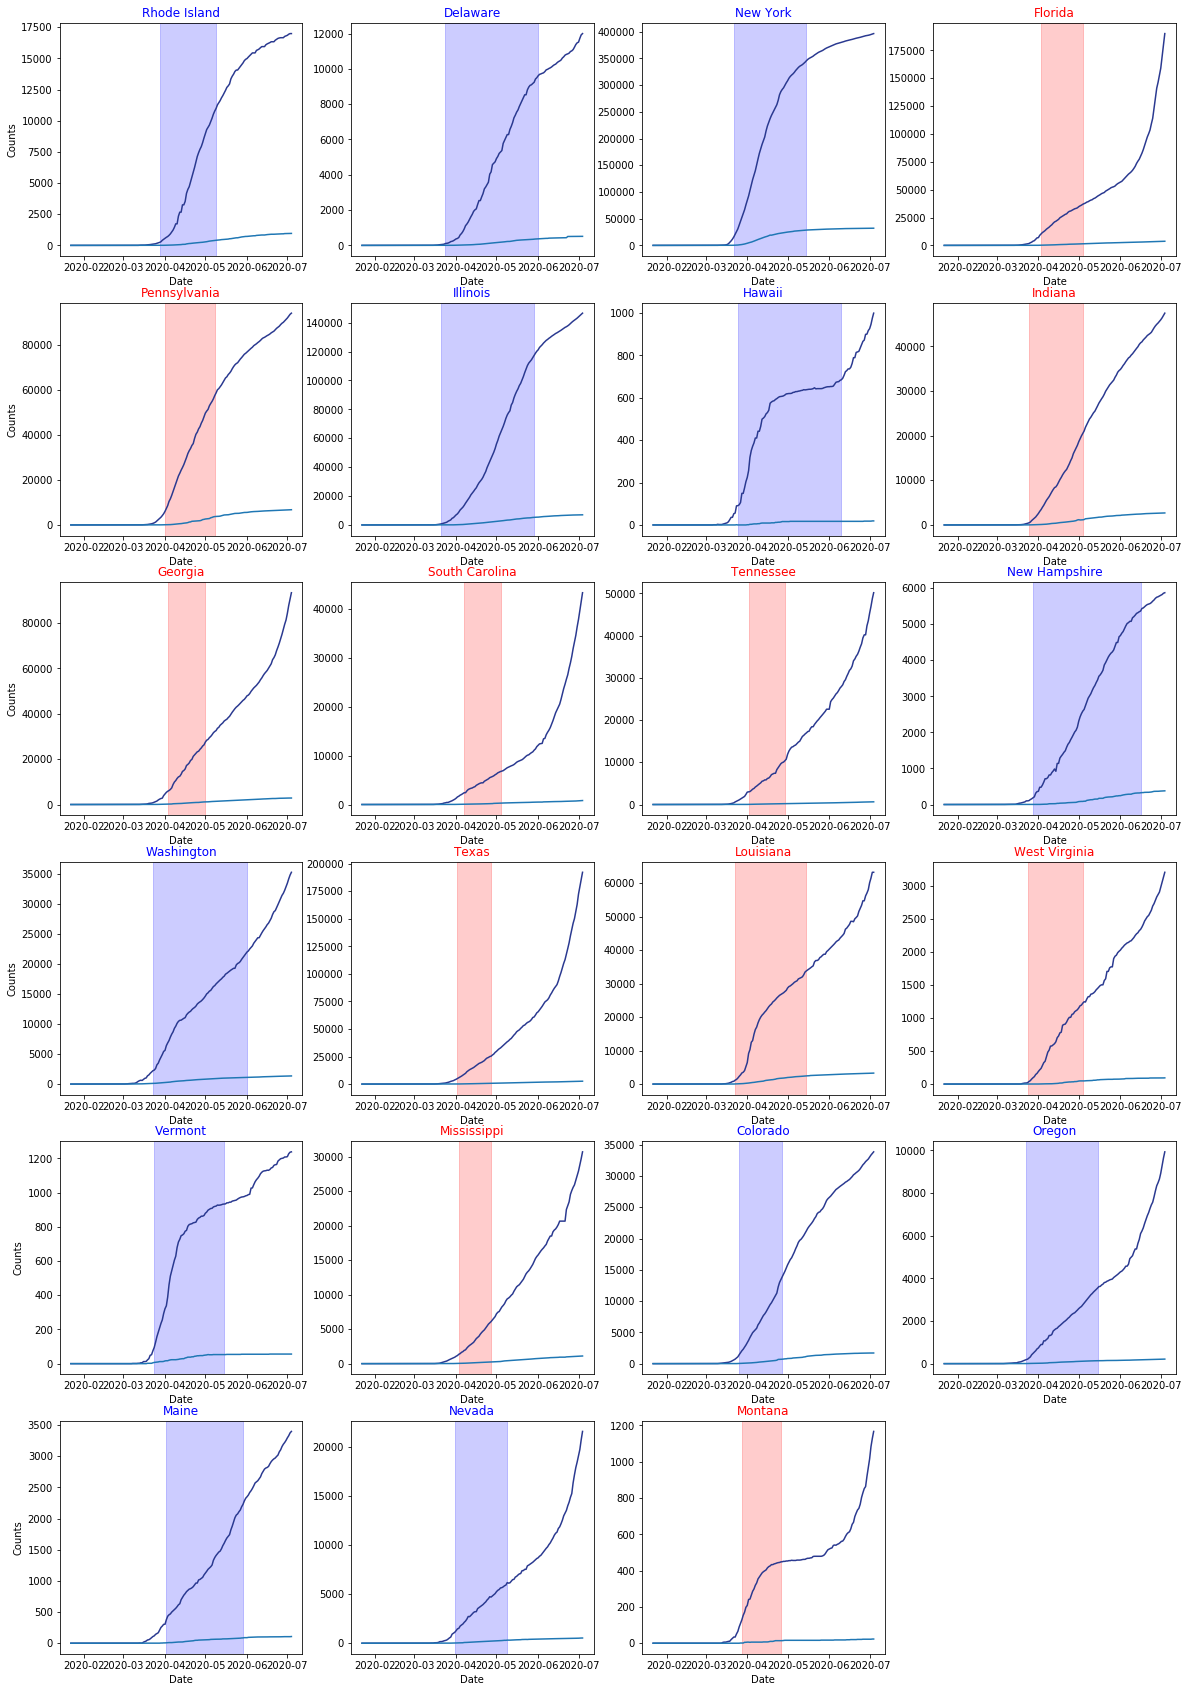

In [50]:
fig, ax = plt.subplots(figsize = (20, 30), nrows = 6, ncols = 4)

i=0
for state in df.loc[df["how_to_plot"]=="eased", "State"]:
    sns.lineplot(x = "Date", 
                 y = "Case", 
                 data = (time_series_cases.loc[time_series_cases["Province/State"]==state]
                         .groupby(["Province/State", "Date"], as_index=False)
                         .agg({"Case":"sum"})),
                 color = "#2a3990", 
                 ax = ax.flatten()[i]);

    ax.flatten()[i].plot("Date",
                         "Case", 
                         data = (time_series_deaths.loc[time_series_deaths["Province/State"]==state]
                                 .groupby(["Province/State", "Date"], as_index=False)
                                 .agg({"Case":"sum"})));

    ax.flatten()[i].set_title(state, color = df.loc[df["State"] == state, "color_2016_pe"].iloc[0])
    ax.flatten()[i].axvspan(df.loc[df["State"] == state, "StayAtHome_start"].iloc[0], 
                            df.loc[df["State"] == state, "StayAtHome_eased"].iloc[0], 
                            alpha=0.2, 
                            color=df.loc[df["State"] == state, "color_2016_pe"].iloc[0]);
    if i not in [0, 4, 8, 12, 16, 20]:
        ax.flatten()[i].set_ylabel("")
    else:
        ax.flatten()[i].set_ylabel("Counts")
    
    ax.flatten()[-1].set_visible(False)
    
    i+=1


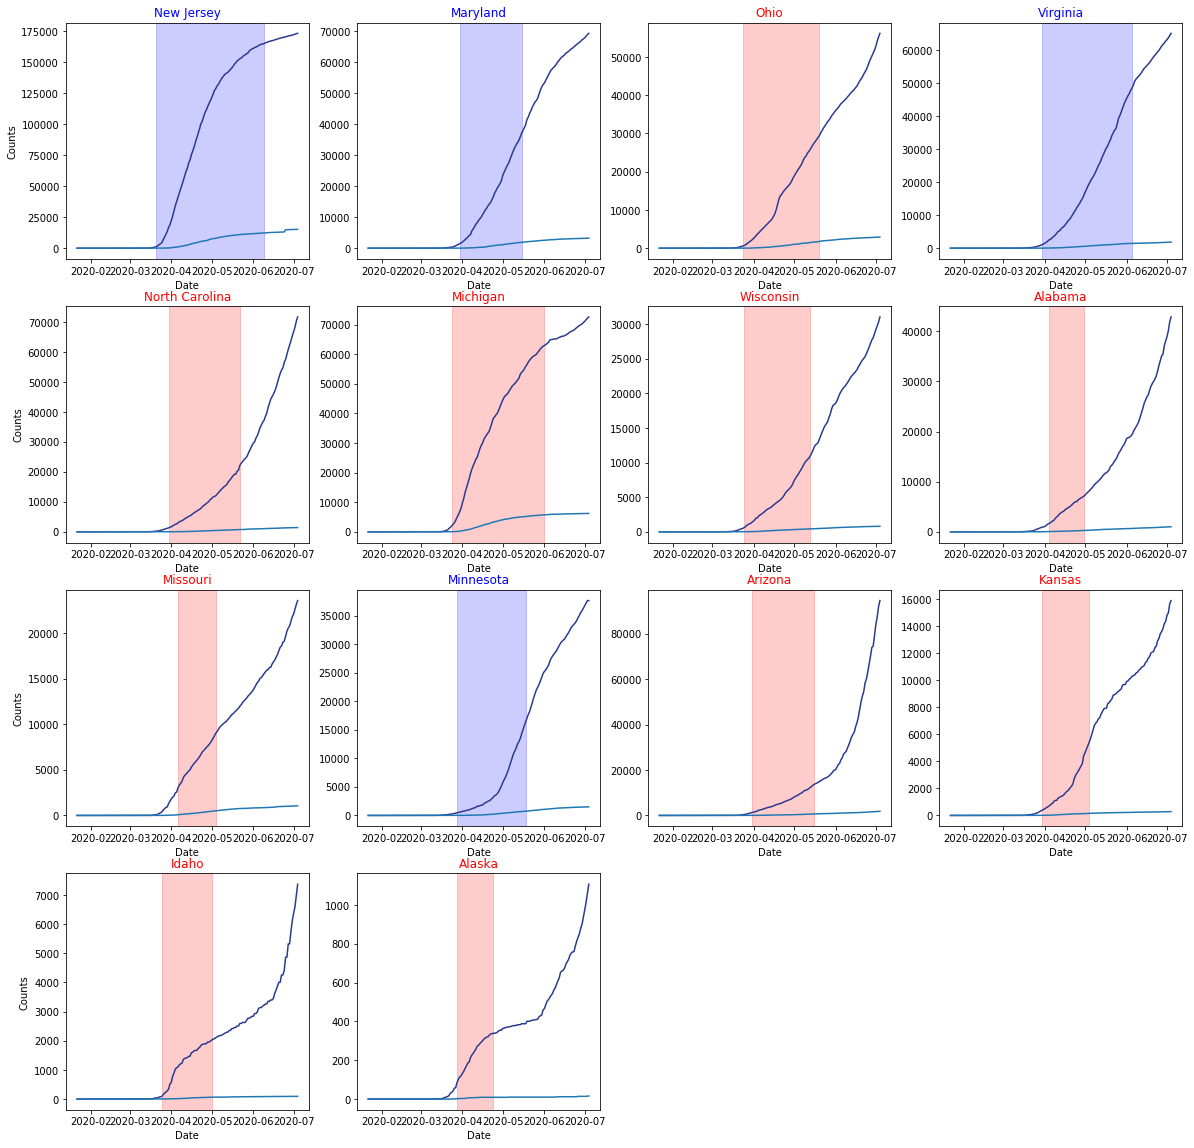

In [51]:
fig, ax = plt.subplots(figsize = (20, 20), nrows = 4, ncols = 4)

i=0
for state in df.loc[df["how_to_plot"]=="ended", "State"]:
    sns.lineplot(x = "Date", 
                 y = "Case", 
                 data = (time_series_cases.loc[time_series_cases["Province/State"]==state]
                         .groupby(["Province/State", "Date"], as_index=False)
                         .agg({"Case":"sum"})),
                 color = "#2a3990", 
                 ax = ax.flatten()[i]);

    ax.flatten()[i].plot("Date",
                         "Case", 
                         data = (time_series_deaths.loc[time_series_deaths["Province/State"]==state]
                                 .groupby(["Province/State", "Date"], as_index=False)
                                 .agg({"Case":"sum"})));

    ax.flatten()[i].set_title(state, color = df.loc[df["State"] == state, "color_2016_pe"].iloc[0])
    ax.flatten()[i].axvspan(df.loc[df["State"] == state, "StayAtHome_start"].iloc[0], 
                            df.loc[df["State"] == state, "StayAtHome_ended"].iloc[0], 
                            alpha=0.2, 
                            color=df.loc[df["State"] == state, "color_2016_pe"].iloc[0])
    if i not in [0,4,8,12]:
        ax.flatten()[i].set_ylabel("")
    else:
        ax.flatten()[i].set_ylabel("Counts")
    i+=1
    ax.flatten()[-1].set_visible(False)
    ax.flatten()[-2].set_visible(False);

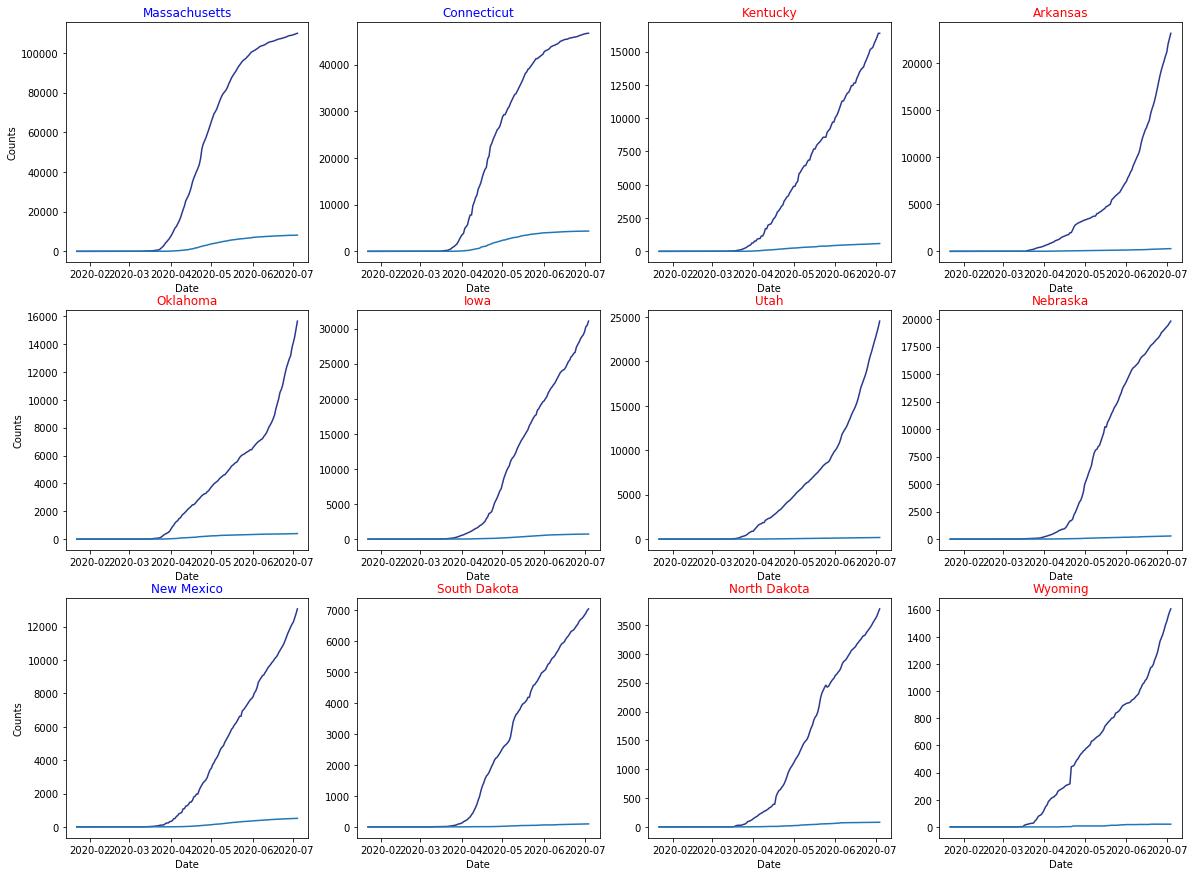

In [52]:
fig, ax = plt.subplots(figsize = (20, 15), nrows = 3, ncols = 4)

i=0
for state in df.loc[df["how_to_plot"]=="none", "State"]:
    sns.lineplot(x = "Date", 
                 y = "Case", 
                 data = (time_series_cases.loc[time_series_cases["Province/State"]==state]
                         .groupby(["Province/State", "Date"], as_index=False)
                         .agg({"Case":"sum"})),
                 color = "#2a3990", 
                 ax = ax.flatten()[i]);

    ax.flatten()[i].plot("Date",
                         "Case", 
                         data = (time_series_deaths.loc[time_series_deaths["Province/State"]==state]
                                 .groupby(["Province/State", "Date"], as_index=False)
                                 .agg({"Case":"sum"})));

    ax.flatten()[i].set_title(state, color = df.loc[df["State"] == state, "color_2016_pe"].iloc[0])
    
    if i not in [0,4,8]:
        ax.flatten()[i].set_ylabel("")
    else:
        ax.flatten()[i].set_ylabel("Counts")
    
    i+=1

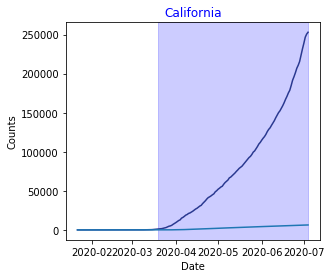

In [53]:
fig, ax = plt.subplots(figsize = (10, 4), nrows = 1, ncols = 2)

i=0
for state in df.loc[df["how_to_plot"]=="ongoing", "State"]:
    sns.lineplot(x = "Date", 
                 y = "Case", 
                 data = (time_series_cases.loc[time_series_cases["Province/State"]==state]
                         .groupby(["Province/State", "Date"], as_index=False)
                         .agg({"Case":"sum"})),
                 color = "#2a3990", 
                 ax = ax.flatten()[i]);

    ax.flatten()[i].plot("Date",
                         "Case", 
                         data = (time_series_deaths.loc[time_series_deaths["Province/State"]==state]
                                 .groupby(["Province/State", "Date"], as_index=False)
                                 .agg({"Case":"sum"})));

    ax.flatten()[i].set_title(state, color = df.loc[df["State"] == state, "color_2016_pe"].iloc[0])
    ax.flatten()[i].axvspan(pd.to_datetime(df.loc[df["State"] == state, "StayAtHome_start"]).iloc[0], 
                        time_series_deaths["Date"].max(), 
                        alpha=0.2, 
                        color=df.loc[df["State"] == state, "color_2016_pe"].iloc[0]);
    
    ax.flatten()[i].set_ylabel("Counts")
    ax.flatten()[-1].set_visible(False)
    i+=1

It is difficult to take any major conclusion from the plots. Some states have long lockdowns but experience surges in the number of cases (Hawaii, Vermont, Louisiana...), while in others the number of cases seems to have stabilized (New York, New Jersey...). These different behaviors can also be seen in states with shorter lockdowns or even no statewide mandatory lockdown at all.
_____
At this point, we realised that in order to compare among the states, we had to re-calculate lockdown length.

We re-calculated lockdown length with the following criteria:
- Where we had start date and end date but no ease date: end - start
- Where we had start date and ease date but no end date: ease - start
- Where we had start date, ease date and end date: ease - start

This way, we considered that the easing of lockdown was equivalent to ending the lockdown. This is a simplification, since after easing the lockdown order there are still restrictions in place, but we thought that it is much more difficult to enforce a relaxed lockdown than a strict one. 

In [54]:
stay_at_home_lengths = []

for row in df.index:
    if pd.notna(df.loc[row, "StayAtHome_start"]):
        if df.loc[row, "how_to_plot"] == "ended":
            stay_at_home_lengths.append(df.loc[row, "StayAtHome_ended"] - df.loc[row, "StayAtHome_start"])
        elif df.loc[row, "how_to_plot"] == "eased":
            stay_at_home_lengths.append(df.loc[row, "StayAtHome_eased"] - df.loc[row, "StayAtHome_start"])
        else:
            stay_at_home_lengths.append(time_series_cases["Date"].max() - df.loc[row, "StayAtHome_start"])
    else:
        stay_at_home_lengths.append(pd.to_timedelta(0))
        
df = df.assign(stay_at_home_lengths_in_days = stay_at_home_lengths)
df["stay_at_home_lengths_in_days"] = df["stay_at_home_lengths_in_days"].dt.days



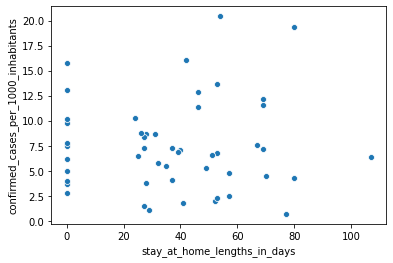

In [55]:
sns.scatterplot(df["stay_at_home_lengths_in_days"], df["confirmed_cases_per_1000_inhabitants"]);

In [56]:
df["stay_at_home_lengths_in_days"].corr(df["confirmed_cases_per_1000_inhabitants"])


0.03629860902314234

In [57]:
df["stay_at_home_lengths_in_days"].corr(df["deaths_per_1000_inhabitants"])

0.1658933573608871

We still saw no correlation between the re-calculated lockdown lengths and confirmed cases per capita/deaths per capita.
__________
Next, we took a look at how the lockdown policies looked for democratic states vs republican states.

In [58]:
lockdowns_df = df[["State", "2016 presidentialelection", "stay_at_home_lengths_in_days"]].copy()

In [59]:
scipy.stats.ttest_ind(lockdowns_df.loc[lockdowns_df["2016 presidentialelection"] == "Democratic"].loc[lockdowns_df["stay_at_home_lengths_in_days"]!=0, "stay_at_home_lengths_in_days"], 
                      lockdowns_df.loc[lockdowns_df["2016 presidentialelection"] == "Republican"].loc[lockdowns_df["stay_at_home_lengths_in_days"]!=0, "stay_at_home_lengths_in_days"],
                      equal_var=False)

Ttest_indResult(statistic=4.5167809320527414, pvalue=0.0001108986462130838)

In [60]:
lockdowns_df.loc[lockdowns_df["2016 presidentialelection"] == "Democratic"].loc[lockdowns_df["stay_at_home_lengths_in_days"]!=0, "stay_at_home_lengths_in_days"].mean()

61.470588235294116

In [61]:
lockdowns_df.loc[lockdowns_df["2016 presidentialelection"] == "Republican"].loc[lockdowns_df["stay_at_home_lengths_in_days"]!=0, "stay_at_home_lengths_in_days"].mean()

37.57142857142857

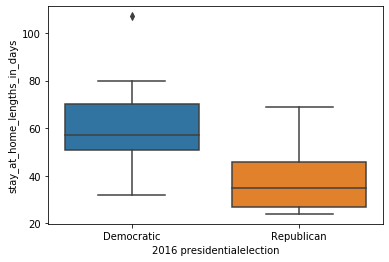

In [62]:
sns.boxplot(data = lockdowns_df.loc[lockdowns_df["stay_at_home_lengths_in_days"]!=0], 
            x = "2016 presidentialelection", 
            y = "stay_at_home_lengths_in_days");

We saw that Democratic states tended to pass significantly longer stay at home orders than Republican states (on average 24 days longer).

In [63]:
lockdowns_df.loc[lockdowns_df["stay_at_home_lengths_in_days"]!=0, ["2016 presidentialelection", "stay_at_home_lengths_in_days"]].to_csv("data/lockdown_lengths_for_tableau.csv")

In [64]:
scipy.stats.ttest_ind(df.loc[df["2016 presidentialelection"]=="Republican", "StayAtHome_deaths_Delta"], 
                      df.loc[df["2016 presidentialelection"]=="Democratic", "StayAtHome_deaths_Delta"], 
                      equal_var=False, 
                      nan_policy="omit")

Ttest_indResult(statistic=0.1272538037464689, pvalue=0.8997575848102439)

In [65]:
scipy.stats.ttest_ind(df.loc[df["2016 presidentialelection"]=="Republican", "StayAtHome_Delta"], 
                      df.loc[df["2016 presidentialelection"]=="Democratic", "StayAtHome_Delta"], 
                      equal_var=False, 
                      nan_policy="omit")

Ttest_indResult(statistic=-1.232121792659352, pvalue=0.22677624161339224)

In [66]:
scipy.stats.ttest_ind(df.loc[df["2016 presidentialelection"]=="Republican", "StayAtHome_Delta"], 
                      df.loc[df["2016 presidentialelection"]=="Democratic", "StayAtHome_Delta"], 
                      equal_var=False, 
                      nan_policy="omit")

Ttest_indResult(statistic=-1.232121792659352, pvalue=0.22677624161339224)

In [67]:
scipy.stats.ttest_ind((df.loc[df["2016 presidentialelection"]=="Republican", "StayAtHome_start"]
                       - time_series_cases["Date"].min()).dt.days, 
                      (df.loc[df["2016 presidentialelection"]=="Democratic", "StayAtHome_start"]
                       - time_series_cases["Date"].min()).dt.days, 
                      equal_var=False, 
                      nan_policy="omit")

Ttest_indResult(statistic=2.9650507713618244, pvalue=0.005350185715503407)

In [68]:
((df.loc[df["2016 presidentialelection"]=="Republican", "StayAtHome_start"]-time_series_cases["Date"].min()).dt.days).mean()

67.85714285714286

In [69]:
((df.loc[df["2016 presidentialelection"]=="Democratic", "StayAtHome_start"] - time_series_cases["Date"].min()).dt.days).mean()

63.64705882352941

In [70]:
scipy.stats.ttest_ind((pd.to_datetime(df.loc[df["2016 presidentialelection"]=="Republican", 
                                             "Date_first_100_confirmed_cases"]) 
                       - time_series_cases["Date"]
                       .min()).dt.days, 
                      (pd.to_datetime(df.loc[df["2016 presidentialelection"]=="Democratic", 
                                             "Date_first_100_confirmed_cases"])
                       - time_series_cases["Date"]
                       .min()).dt.days, 
                      equal_var=False, 
                      nan_policy="omit")

Ttest_indResult(statistic=2.591908041060646, pvalue=0.013273805720076375)

In [71]:
(((df.loc[df["2016 presidentialelection"]=="Republican", "Date_first_100_confirmed_cases"]
   - time_series_cases["Date"].min())
  .dt.days)
 .mean())

103.83333333333333

In [72]:
(((df.loc[df["2016 presidentialelection"]=="Democratic", "Date_first_100_confirmed_cases"]
   - time_series_cases["Date"].min())
  .dt.days)
 .mean())

82.75

We observed a significant difference between the lockdown starting dates, with Republican states starting their lockdowns slightly later on average than Democratic states. However, we also saw that Republican cases reached their first 100 cases a bit later than Democratic states. When we compared the time between reaching the first 100 cases and imposing the lockdowns, there was no significant difference between Republican and Democratic states.

## Testing

Finally, we looked into differences in testing between Democratic and Republican States.

In [73]:
scipy.stats.ttest_ind(df.loc[df["2016 presidentialelection"]=="Democratic", "tests_per_1000_inhabitants"], 
                      df.loc[df["2016 presidentialelection"]=="Republican", "tests_per_1000_inhabitants"], 
                      equal_var=False)

Ttest_indResult(statistic=1.9168118584975071, pvalue=0.06496075616253925)

In [74]:
df.loc[df["2016 presidentialelection"]=="Democratic", "tests_per_1000_inhabitants"].mean()

90.2266010769968

In [75]:
df.loc[df["2016 presidentialelection"]=="Republican", "tests_per_1000_inhabitants"].mean()

73.43454493277406

We found no significant differences in the total number of tests per 1000 inhabitants by 2020.07.04 (the last day for which we have data).

# Plots for presentation

### Lockdown time series (no date of first 100 confirmed cases)

In [76]:
df_for_plot = (df[["State", 
                   "2016 presidentialelection", 
                   "Date_first_100_confirmed_cases", 
                   "StayAtHome_start", 
                   "StayAtHome_eased", 
                   "StayAtHome_ended", 
                   "how_to_plot", 
                   "color_2016_pe"]].copy())
df_for_plot = df_for_plot.sort_values("2016 presidentialelection")

In [77]:
df_for_plot = df_for_plot.assign(index = np.arange(1,51))
df_for_plot = (df_for_plot[["index", 
                            "State", 
                            "2016 presidentialelection", 
                            "Date_first_100_confirmed_cases", 
                            "StayAtHome_start", 
                            "StayAtHome_eased", 
                            "StayAtHome_ended", 
                            "how_to_plot", 
                            "color_2016_pe"]])

In [78]:
df_for_plot["color_2016_pe"] = np.where(df_for_plot["color_2016_pe"] == "blue", "#4E79A7", "#E15759")

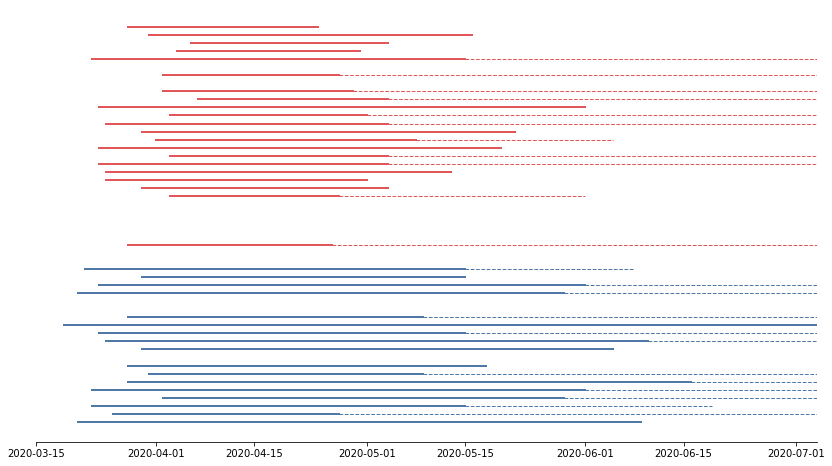

In [79]:
fig, ax = plt.subplots(figsize=(14,8))

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.yticks([])

for index in df_for_plot.index:
    if df_for_plot.loc[index, "how_to_plot"]=="ended":
        plt.plot_date([df_for_plot.loc[index, "StayAtHome_start"], df_for_plot.loc[index, "StayAtHome_ended"]], 
                      [df_for_plot.loc[index, "index"], df_for_plot.loc[index, "index"]], 
                      color=df_for_plot.loc[index, "color_2016_pe"], 
                      linestyle='-', 
                      linewidth=2, 
                      marker="")
    elif df_for_plot.loc[index, "how_to_plot"]=="eased":
        plt.plot_date([df_for_plot.loc[index, "StayAtHome_start"], df_for_plot.loc[index, "StayAtHome_eased"]], 
                      [df_for_plot.loc[index, "index"], df_for_plot.loc[index, "index"]], 
                      color=df_for_plot.loc[index, "color_2016_pe"], 
                      linestyle='-', 
                      linewidth=2, 
                      marker="")
        if pd.notna(df_for_plot.loc[index, "StayAtHome_ended"]):
            plt.plot_date([df_for_plot.loc[index, "StayAtHome_eased"], df_for_plot.loc[index, "StayAtHome_ended"]], 
                          [df_for_plot.loc[index, "index"], df_for_plot.loc[index, "index"]], 
                          color=df_for_plot.loc[index, "color_2016_pe"], 
                          linestyle='--', 
                          linewidth=1, 
                          marker="")
        else:
            plt.plot_date([df_for_plot.loc[index, "StayAtHome_eased"], time_series_cases["Date"].max()], 
                          [df_for_plot.loc[index, "index"], df_for_plot.loc[index, "index"]], 
                          color=df_for_plot.loc[index, "color_2016_pe"], 
                          linestyle='--', 
                          linewidth=1, 
                          marker="")
    elif df_for_plot.loc[index, "how_to_plot"]=="ongoing":
        plt.plot_date([df_for_plot.loc[index, "StayAtHome_start"], time_series_cases["Date"].max()], 
                      [df_for_plot.loc[index, "index"], df_for_plot.loc[index, "index"]], 
                      color=df_for_plot.loc[index, "color_2016_pe"], 
                      linestyle='-', 
                      linewidth=2, 
                      marker="")
        
ax.set_xlim((pd.to_datetime("20200315"), time_series_cases["Date"].max()))

plt.savefig("images/stay_at_home_orders_plot.png", bbox_inches="tight");

### Lockdown time series (including date of first 100 confirmed cases)

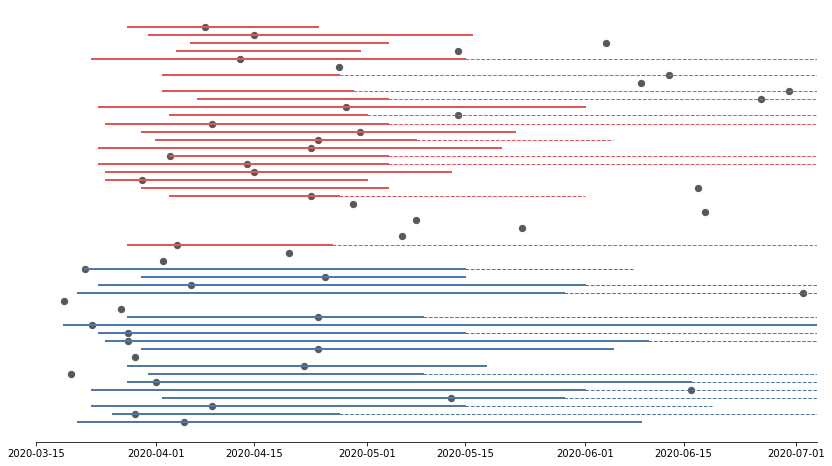

In [80]:
fig, ax = plt.subplots(figsize=(14,8))

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.yticks([])

plt.scatter("Date_first_100_confirmed_cases", "index", data = df_for_plot, s=40, color="#585858")


for index in df_for_plot.index:
    if df_for_plot.loc[index, "how_to_plot"]=="ended":
        plt.plot_date([df_for_plot.loc[index, "StayAtHome_start"], df_for_plot.loc[index, "StayAtHome_ended"]], 
                      [df_for_plot.loc[index, "index"], df_for_plot.loc[index, "index"]], 
                      color=df_for_plot.loc[index, "color_2016_pe"], 
                      linestyle='-', 
                      linewidth=2, 
                      marker="")
    elif df_for_plot.loc[index, "how_to_plot"]=="eased":
        plt.plot_date([df_for_plot.loc[index, "StayAtHome_start"], df_for_plot.loc[index, "StayAtHome_eased"]], 
                      [df_for_plot.loc[index, "index"], df_for_plot.loc[index, "index"]], 
                      color=df_for_plot.loc[index, "color_2016_pe"], 
                      linestyle='-', 
                      linewidth=2, 
                      marker="")
        if pd.notna(df_for_plot.loc[index, "StayAtHome_ended"]):
            plt.plot_date([df_for_plot.loc[index, "StayAtHome_eased"], df_for_plot.loc[index, "StayAtHome_ended"]], 
                          [df_for_plot.loc[index, "index"], df_for_plot.loc[index, "index"]], 
                          color=df_for_plot.loc[index, "color_2016_pe"], 
                          linestyle='--', 
                          linewidth=1, 
                          marker="")
        else:
            plt.plot_date([df_for_plot.loc[index, "StayAtHome_eased"], time_series_cases["Date"].max()], 
                          [df_for_plot.loc[index, "index"], df_for_plot.loc[index, "index"]], 
                          color=df_for_plot.loc[index, "color_2016_pe"], 
                          linestyle='--', 
                          linewidth=1, 
                          marker="")
    elif df_for_plot.loc[index, "how_to_plot"]=="ongoing":
        plt.plot_date([df_for_plot.loc[index, "StayAtHome_start"], time_series_cases["Date"].max()], 
                      [df_for_plot.loc[index, "index"], df_for_plot.loc[index, "index"]], 
                      color=df_for_plot.loc[index, "color_2016_pe"], 
                      linestyle='-', 
                      linewidth=2, 
                      marker="")
        
ax.set_xlim((pd.to_datetime("20200315"), time_series_cases["Date"].max()))
plt.savefig("images/stay_at_home_orders_plot_with_dots.png", bbox_inches="tight")


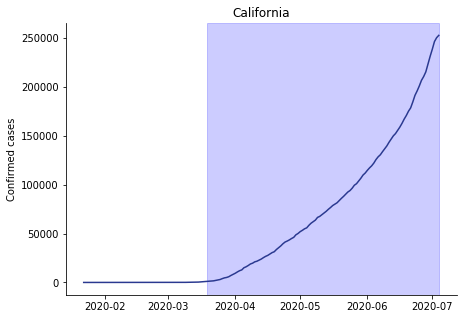

In [81]:
fig, ax = plt.subplots(figsize = (7, 5))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
i=0
state = "California"
sns.lineplot(x = "Date", 
             y = "Case", 
             data = (time_series_cases.loc[time_series_cases["Province/State"]==state]
                     .groupby(["Province/State", "Date"], as_index=False)
                     .agg({"Case":"sum"})),
             color = "#2a3990", 
             ax = ax);

ax.set_title(state, color = "black")
ax.axvspan(pd.to_datetime(df.loc[df["State"] == state, "StayAtHome_start"]).iloc[0], 
                    time_series_deaths["Date"].max(), 
                    alpha=0.2, 
                    color=df.loc[df["State"] == state, "color_2016_pe"].iloc[0]);
plt.ylabel("Confirmed cases")
plt.xlabel("")

i+=1

plt.savefig("images/california_time_series.png", bbox_inches="tight")


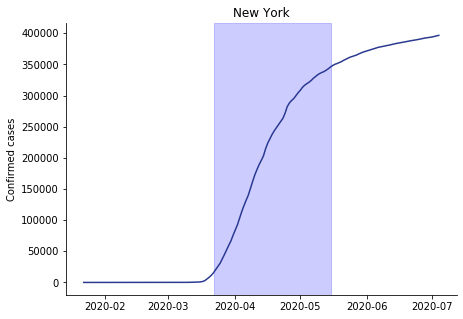

In [82]:
fig, ax = plt.subplots(figsize = (7, 5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
i=0
state = "New York"
sns.lineplot(x = "Date", 
             y = "Case", 
             data = (time_series_cases.loc[time_series_cases["Province/State"]==state]
                     .groupby(["Province/State", "Date"], as_index=False)
                     .agg({"Case":"sum"})),
             color = "#2a3990", 
             ax = ax);

ax.set_title(state, color = "black")
ax.axvspan(pd.to_datetime(df.loc[df["State"] == state, "StayAtHome_start"]).iloc[0], 
                    pd.to_datetime(df.loc[df["State"] == state, "StayAtHome_eased"]).iloc[0], 
                    alpha=0.2, 
                    color=df.loc[df["State"] == state, "color_2016_pe"].iloc[0]);
plt.ylabel("Confirmed cases")
plt.xlabel("")

i+=1

plt.savefig("images/new_york_time_series.png", bbox_inches="tight")
